In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
df = pd.read_csv('car data.csv')
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [2]:

df.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Driven_kms',
       'Fuel_Type', 'Selling_type', 'Transmission', 'Owner'],
      dtype='object')

In [3]:

df.dtypes

Car_Name          object
Year               int64
Selling_Price    float64
Present_Price    float64
Driven_kms         int64
Fuel_Type         object
Selling_type      object
Transmission      object
Owner              int64
dtype: object

In [5]:

def value_counts():
    for i in df.columns:
        print(df[i].value_counts())
value_counts()

Car_Name
city                  26
corolla altis         16
verna                 14
fortuner              11
brio                  10
                      ..
Honda Activa 125       1
Hero Hunk              1
Hero  Ignitor Disc     1
Hero  CBZ Xtreme       1
Bajaj  ct 100          1
Name: count, Length: 98, dtype: int64
Year
2015    61
2016    50
2014    38
2017    35
2013    33
2012    23
2011    19
2010    15
2008     7
2009     6
2005     4
2006     4
2007     2
2003     2
2018     1
2004     1
Name: count, dtype: int64
Selling_Price
0.45     8
0.60     8
4.50     7
5.25     7
4.75     6
        ..
10.11    1
6.40     1
8.55     1
9.50     1
11.50    1
Name: count, Length: 156, dtype: int64
Present_Price
9.40     14
13.60    13
5.70      8
1.47      7
4.43      6
         ..
6.10      1
13.09     1
11.60     1
11.00     1
12.50     1
Name: count, Length: 148, dtype: int64
Driven_kms
15000    9
45000    9
40000    5
25000    5
50000    5
        ..
60076    1
33988    1
87934    1
90

In [6]:
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Driven_kms       0
Fuel_Type        0
Selling_type     0
Transmission     0
Owner            0
dtype: int64

In [7]:

df.shape

(301, 9)

In [8]:
df.duplicated().sum()

np.int64(2)

In [9]:
df


,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


In [10]:
numerical_feat =[]
categorical_feat=[]
for i in df.columns:
    if (df[i].dtypes !=object):
        numerical_feat.append(i)
    else:
        categorical_feat.append(i)

In [11]:
len(numerical_feat)

5

In [12]:

numerical_feat

['Year', 'Selling_Price', 'Present_Price', 'Driven_kms', 'Owner']

In [13]:

len(categorical_feat)

4

In [14]:

categorical_feat

['Car_Name', 'Fuel_Type', 'Selling_type', 'Transmission']

In [19]:
df[numerical_feat].corr()

,Year,Selling_Price,Present_Price,Driven_kms,Owner
Year,1.000000,0.236141,-0.047192,-0.524342,-0.182104
Selling_Price,0.236141,1.000000,0.878914,0.029187,-0.088344
Present_Price,-0.047192,0.878914,1.000000,0.203618,0.008058
Driven_kms,-0.524342,0.029187,0.203618,1.000000,0.089216
Owner,-0.182104,-0.088344,0.008058,0.089216,1.000000


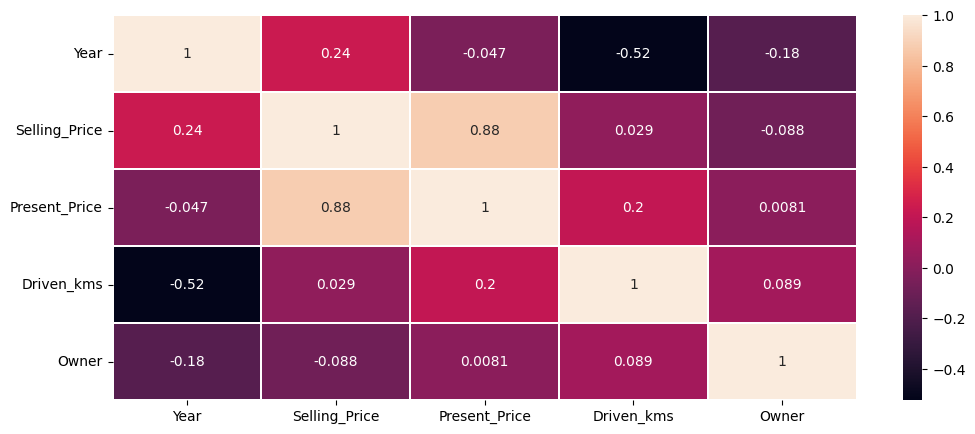

In [21]:

plt.figure(figsize = (12,5))
ax = sns.heatmap(df[numerical_feat].corr(), annot=True, linewidths=.1)
plt.show()

In [24]:

df[categorical_feat].head()

,Car_Name,Fuel_Type,Selling_type,Transmission
0,ritz,Petrol,Dealer,Manual
1,sx4,Diesel,Dealer,Manual
2,ciaz,Petrol,Dealer,Manual
3,wagon r,Petrol,Dealer,Manual
4,swift,Diesel,Dealer,Manual


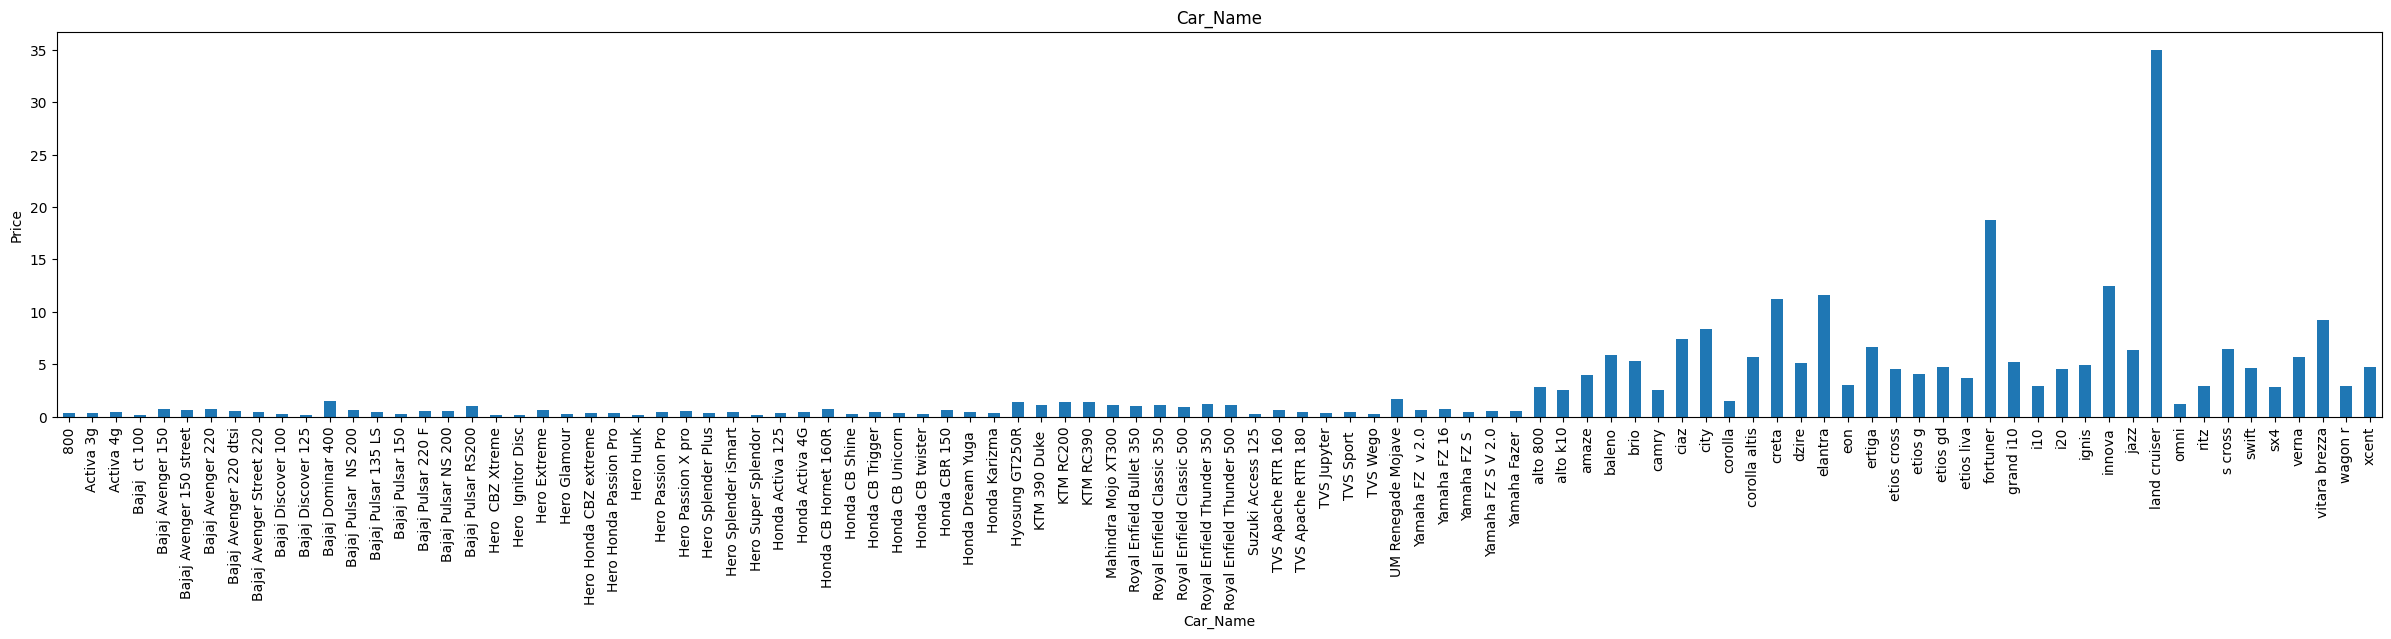

<Figure size 1000x1000 with 0 Axes>

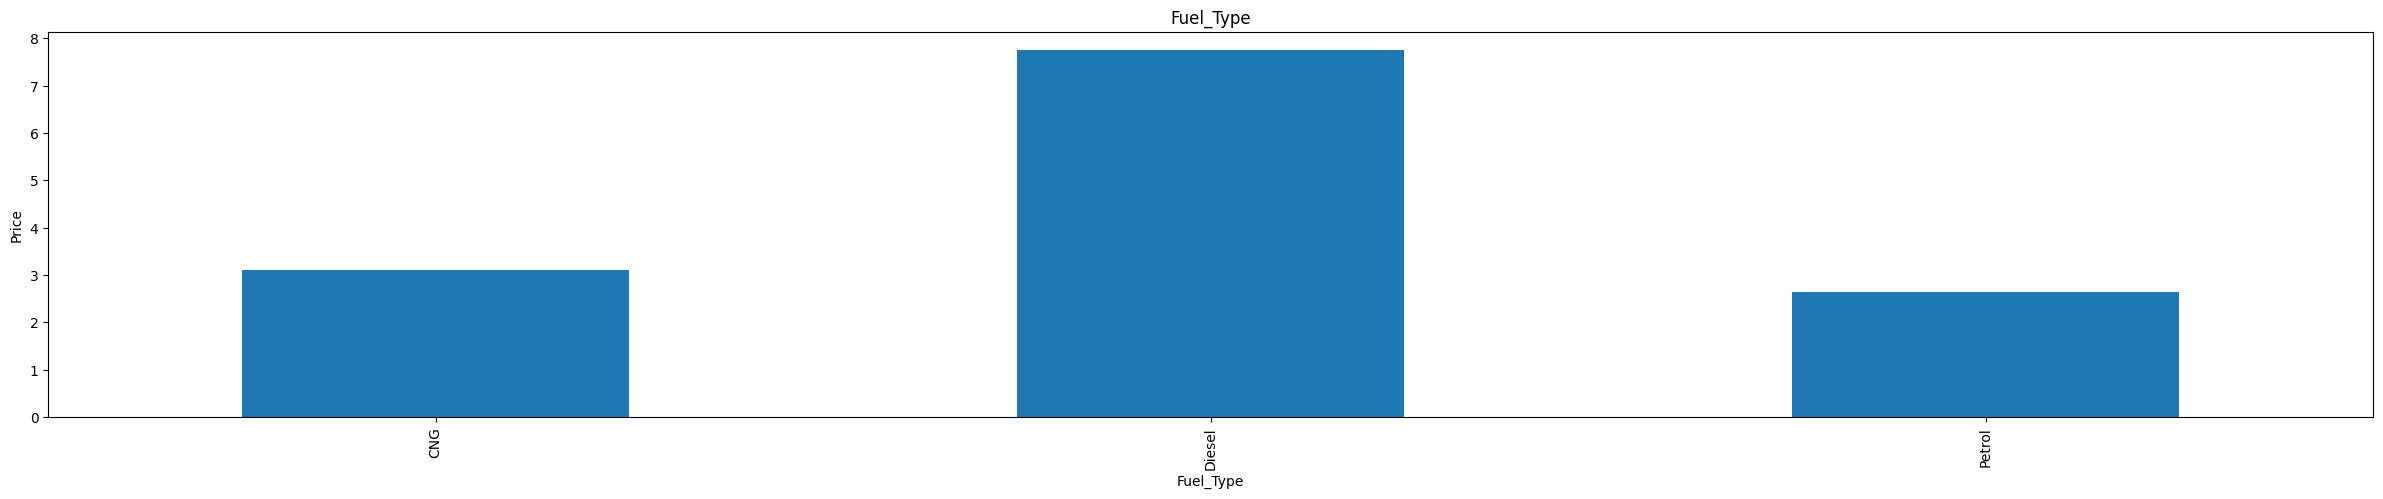

<Figure size 1000x1000 with 0 Axes>

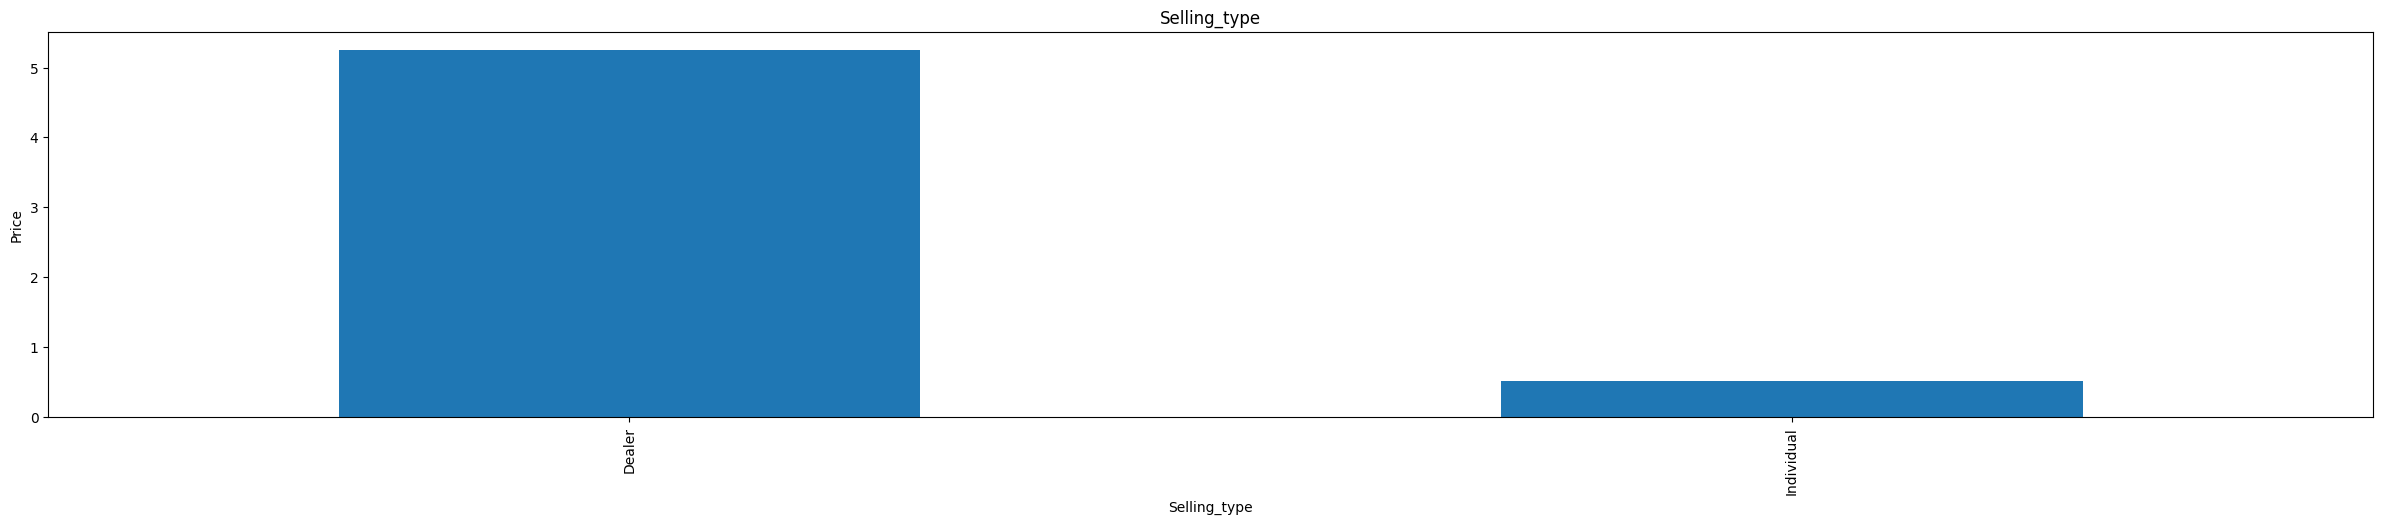

<Figure size 1000x1000 with 0 Axes>

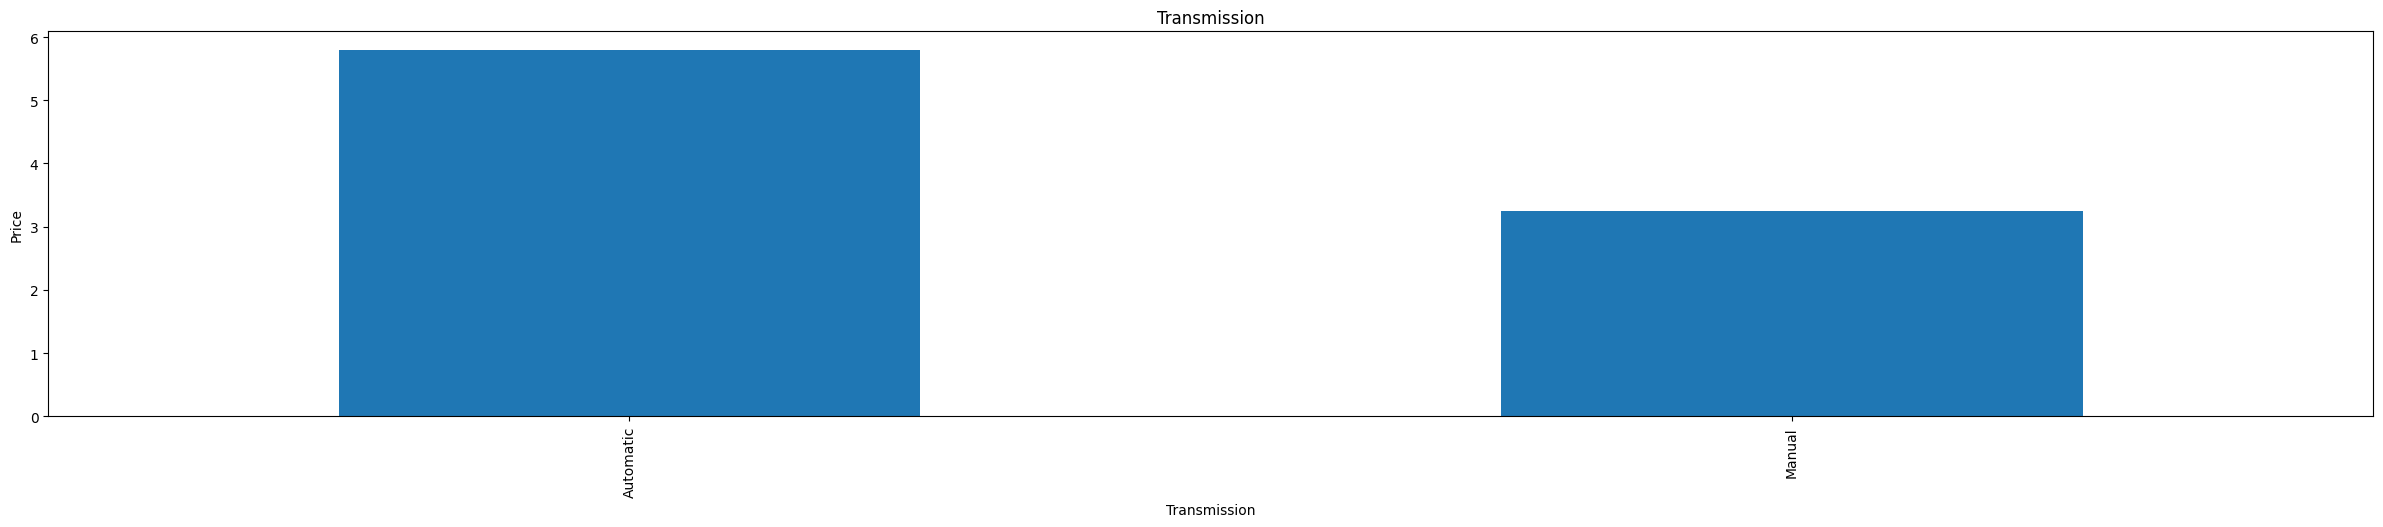

<Figure size 1000x1000 with 0 Axes>

In [25]:
for feature in categorical_feat:
    plt.figure(figsize = (30,5))
    df.groupby(feature)['Selling_Price'].median().plot.bar()
    plt.xlabel(feature)
    plt.ylabel('Price')
    plt.title(feature)
    plt.figure(figsize=(10,10))
    plt.show()

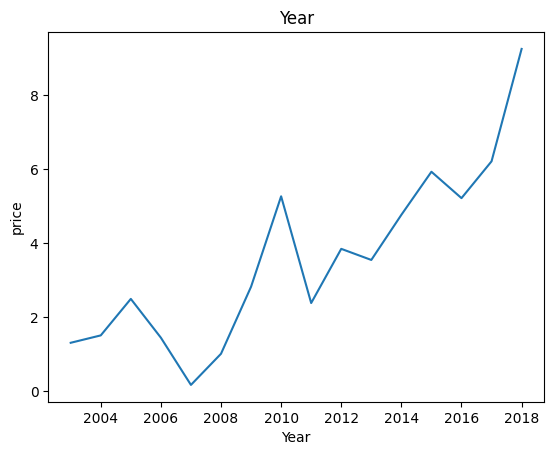

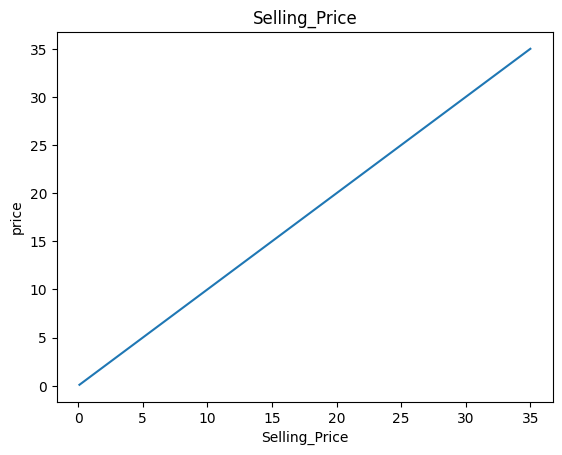

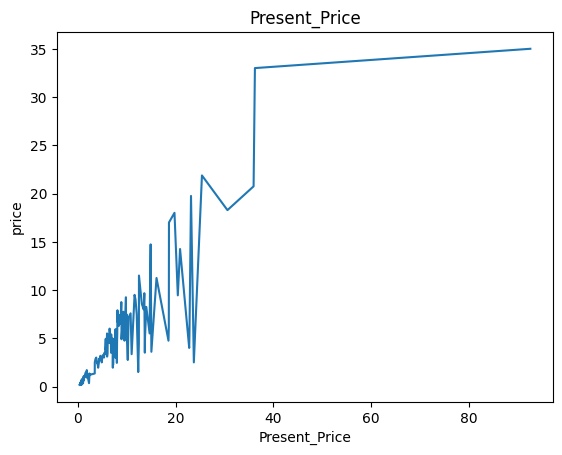

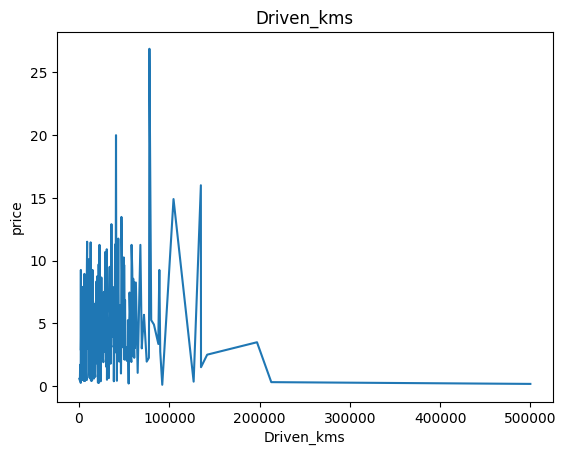

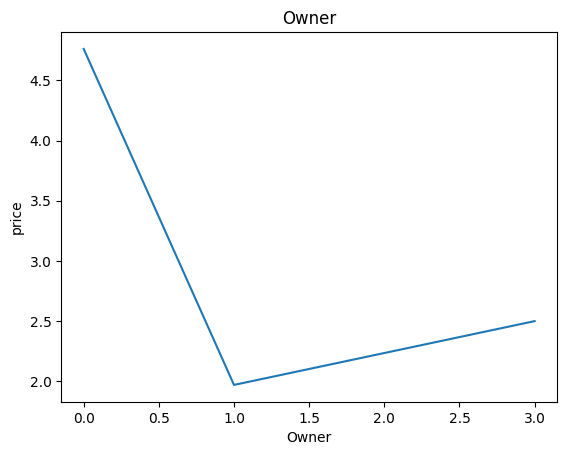

In [26]:
for feature in numerical_feat:
    df.groupby(feature)['Selling_Price'].mean().plot()
    plt.xlabel(feature)
    plt.ylabel('price')
    plt.title(feature)
    plt.show()

In [27]:
discrete_feature=[feature for feature in numerical_feat if len(df[feature].unique())<25 and feature not in ['Id']]
print("Discrete Variables Count: {}".format(len(discrete_feature)))

Discrete Variables Count: 2


In [28]:

print("Discrete Variables Count:", len(discrete_feature))
discrete_feature

Discrete Variables Count: 2


['Year', 'Owner']

In [29]:
df[discrete_feature].head()

,Year,Owner
0,2014,0
1,2013,0
2,2017,0
3,2011,0
4,2014,0


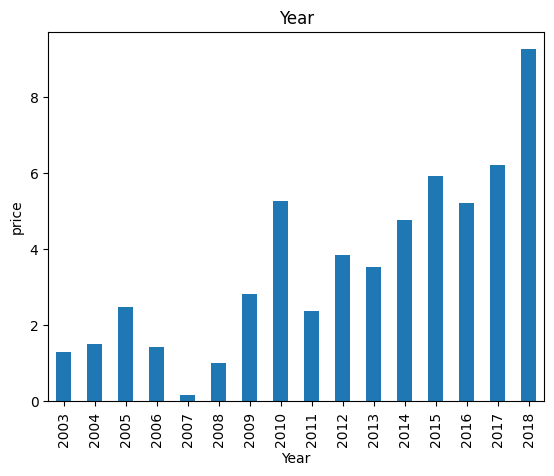

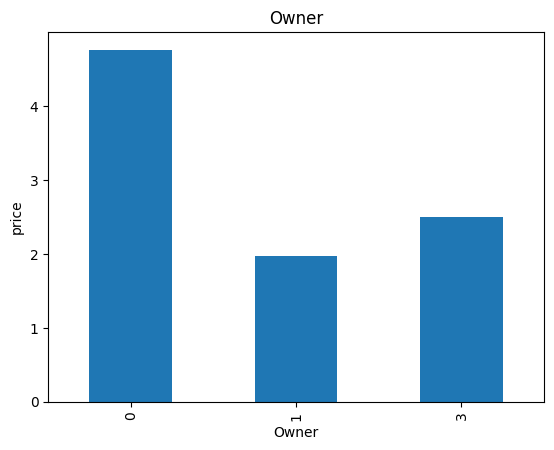

In [30]:
for feature in discrete_feature:
    df.groupby(feature)['Selling_Price'].mean().plot.bar()
    plt.xlabel(feature)
    plt.ylabel('price')
    plt.title(feature)
    plt.show()

In [31]:
continuous_feature=[feature for feature in numerical_feat if feature not in discrete_feature]
continuous_feature

['Selling_Price', 'Present_Price', 'Driven_kms']

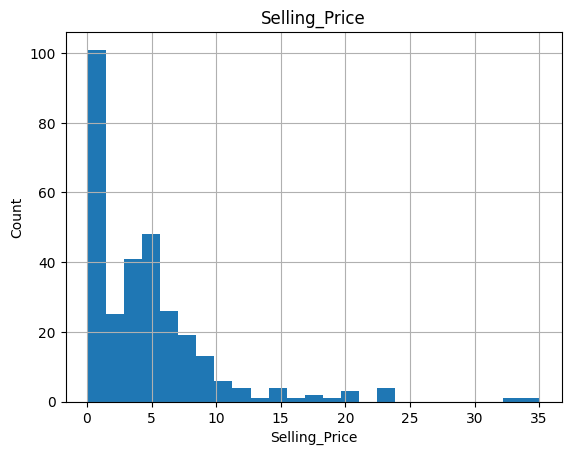

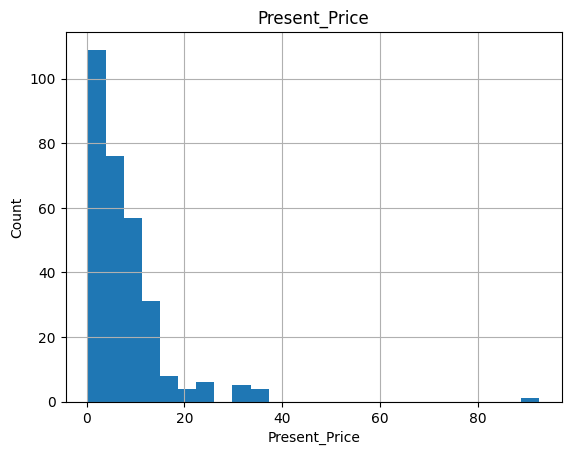

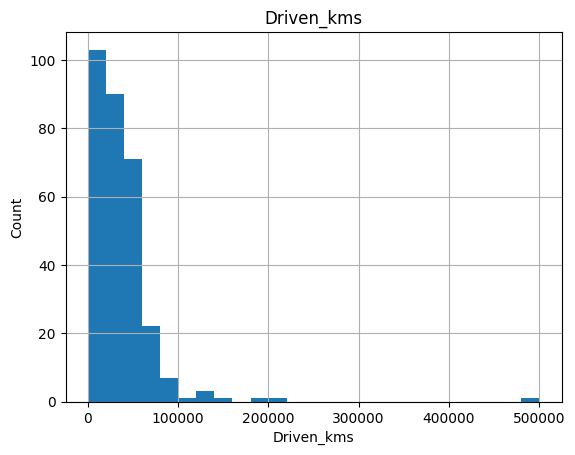

In [32]:
for feature in continuous_feature:
    df[feature].hist(bins=25)
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.title(feature)
    plt.show()

C:\Users\DELL\AppData\Roaming\Python\Python311\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\DELL\AppData\Roaming\Python\Python311\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


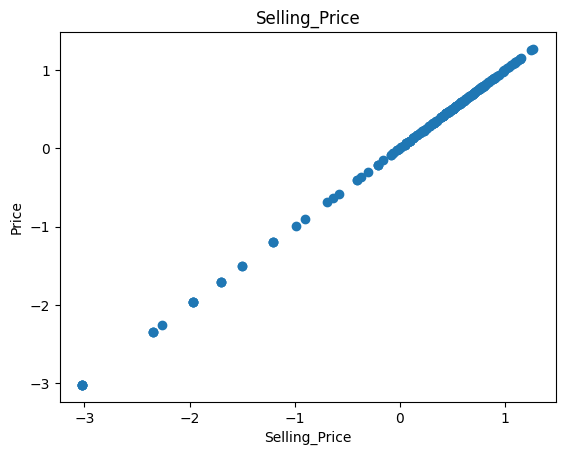

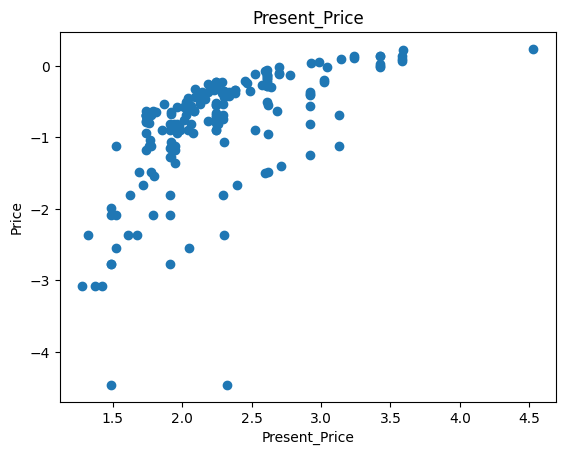

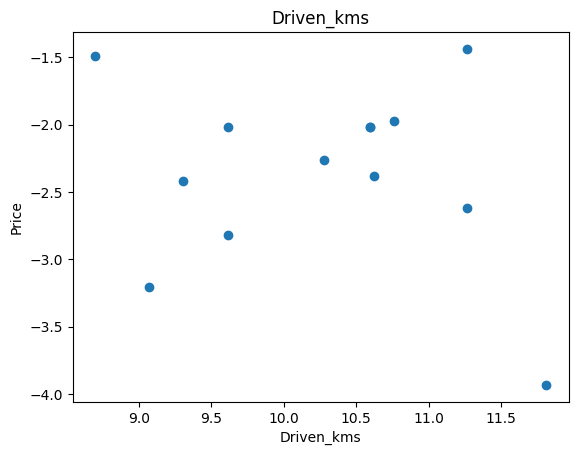

In [33]:
for feature in continuous_feature:
    if 0 in df[feature].unique():
        pass
    else:
        df[feature]=np.log(df[feature])
        df['Selling_Price']=np.log(df['Selling_Price'])
        plt.scatter(df[feature],df['Selling_Price'])
        plt.xlabel(feature)
        plt.ylabel('Price')
        plt.title(feature)
        plt.show()

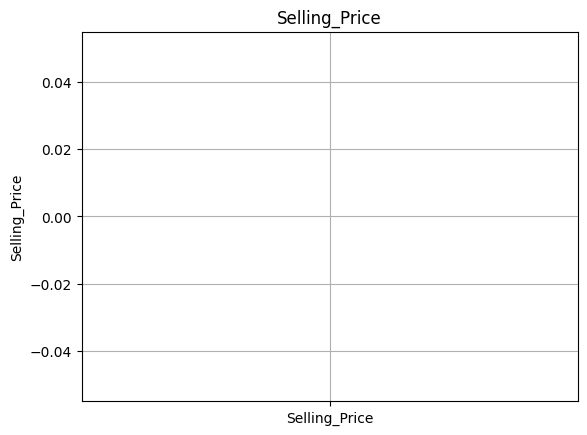

C:\Users\DELL\AppData\Roaming\Python\Python311\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


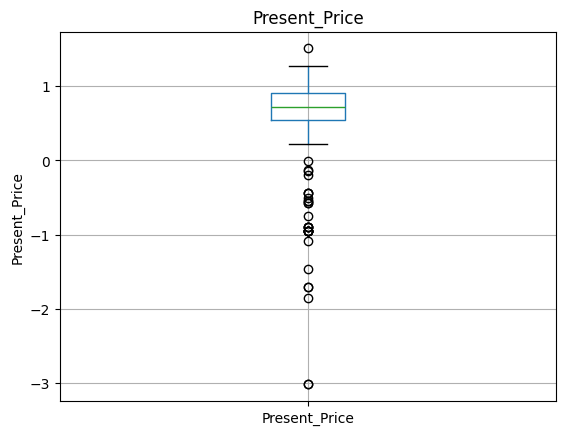

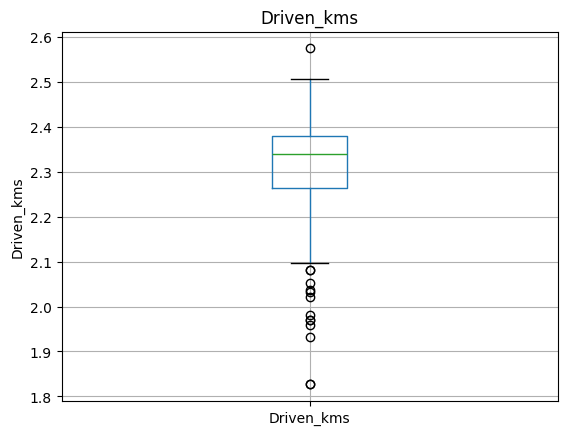

In [34]:
for feature in continuous_feature:
    if 0 in df[feature].unique():
        pass
    else:
        df[feature]=np.log(df[feature])
        df.boxplot(column=feature)
        plt.ylabel(feature)
        plt.title(feature)
        plt.show()

In [35]:
x=df[numerical_feat]
x.head()

,Year,Selling_Price,Present_Price,Driven_kms,Owner
0,2014,NaN,0.542893,2.322740,0
1,2013,NaN,0.813369,2.367338,0
2,2017,NaN,0.827447,2.179205,0
3,2011,NaN,0.352843,2.146681,0
4,2014,NaN,0.656050,2.366131,0


In [36]:

y = df.iloc[:,-1:]
y.head()

,Owner
0,0
1,0
2,0
3,0
4,0


In [40]:
feat = PCA(n_components=5)
feat

,n_components,5
,copy,True
,whiten,False
,svd_solver,'auto'
,tol,0.0
,iterated_power,'auto'
,n_oversamples,10
,power_iteration_normalizer,'auto'
,random_state,None


In [46]:
feat.get_params()
feat


,n_components,5
,copy,True
,whiten,False
,svd_solver,'auto'
,tol,0.0
,iterated_power,'auto'
,n_oversamples,10
,power_iteration_normalizer,'auto'
,random_state,None


In [47]:
feat.get_params()


{'copy': True,
 'iterated_power': 'auto',
 'n_components': 5,
 'n_oversamples': 10,
 'power_iteration_normalizer': 'auto',
 'random_state': None,
 'svd_solver': 'auto',
 'tol': 0.0,
 'whiten': False}